1/9
2/9
3/9
4/9
5/9
6/9
7/9
8/9
9/9
events kept/total: 25064/88558


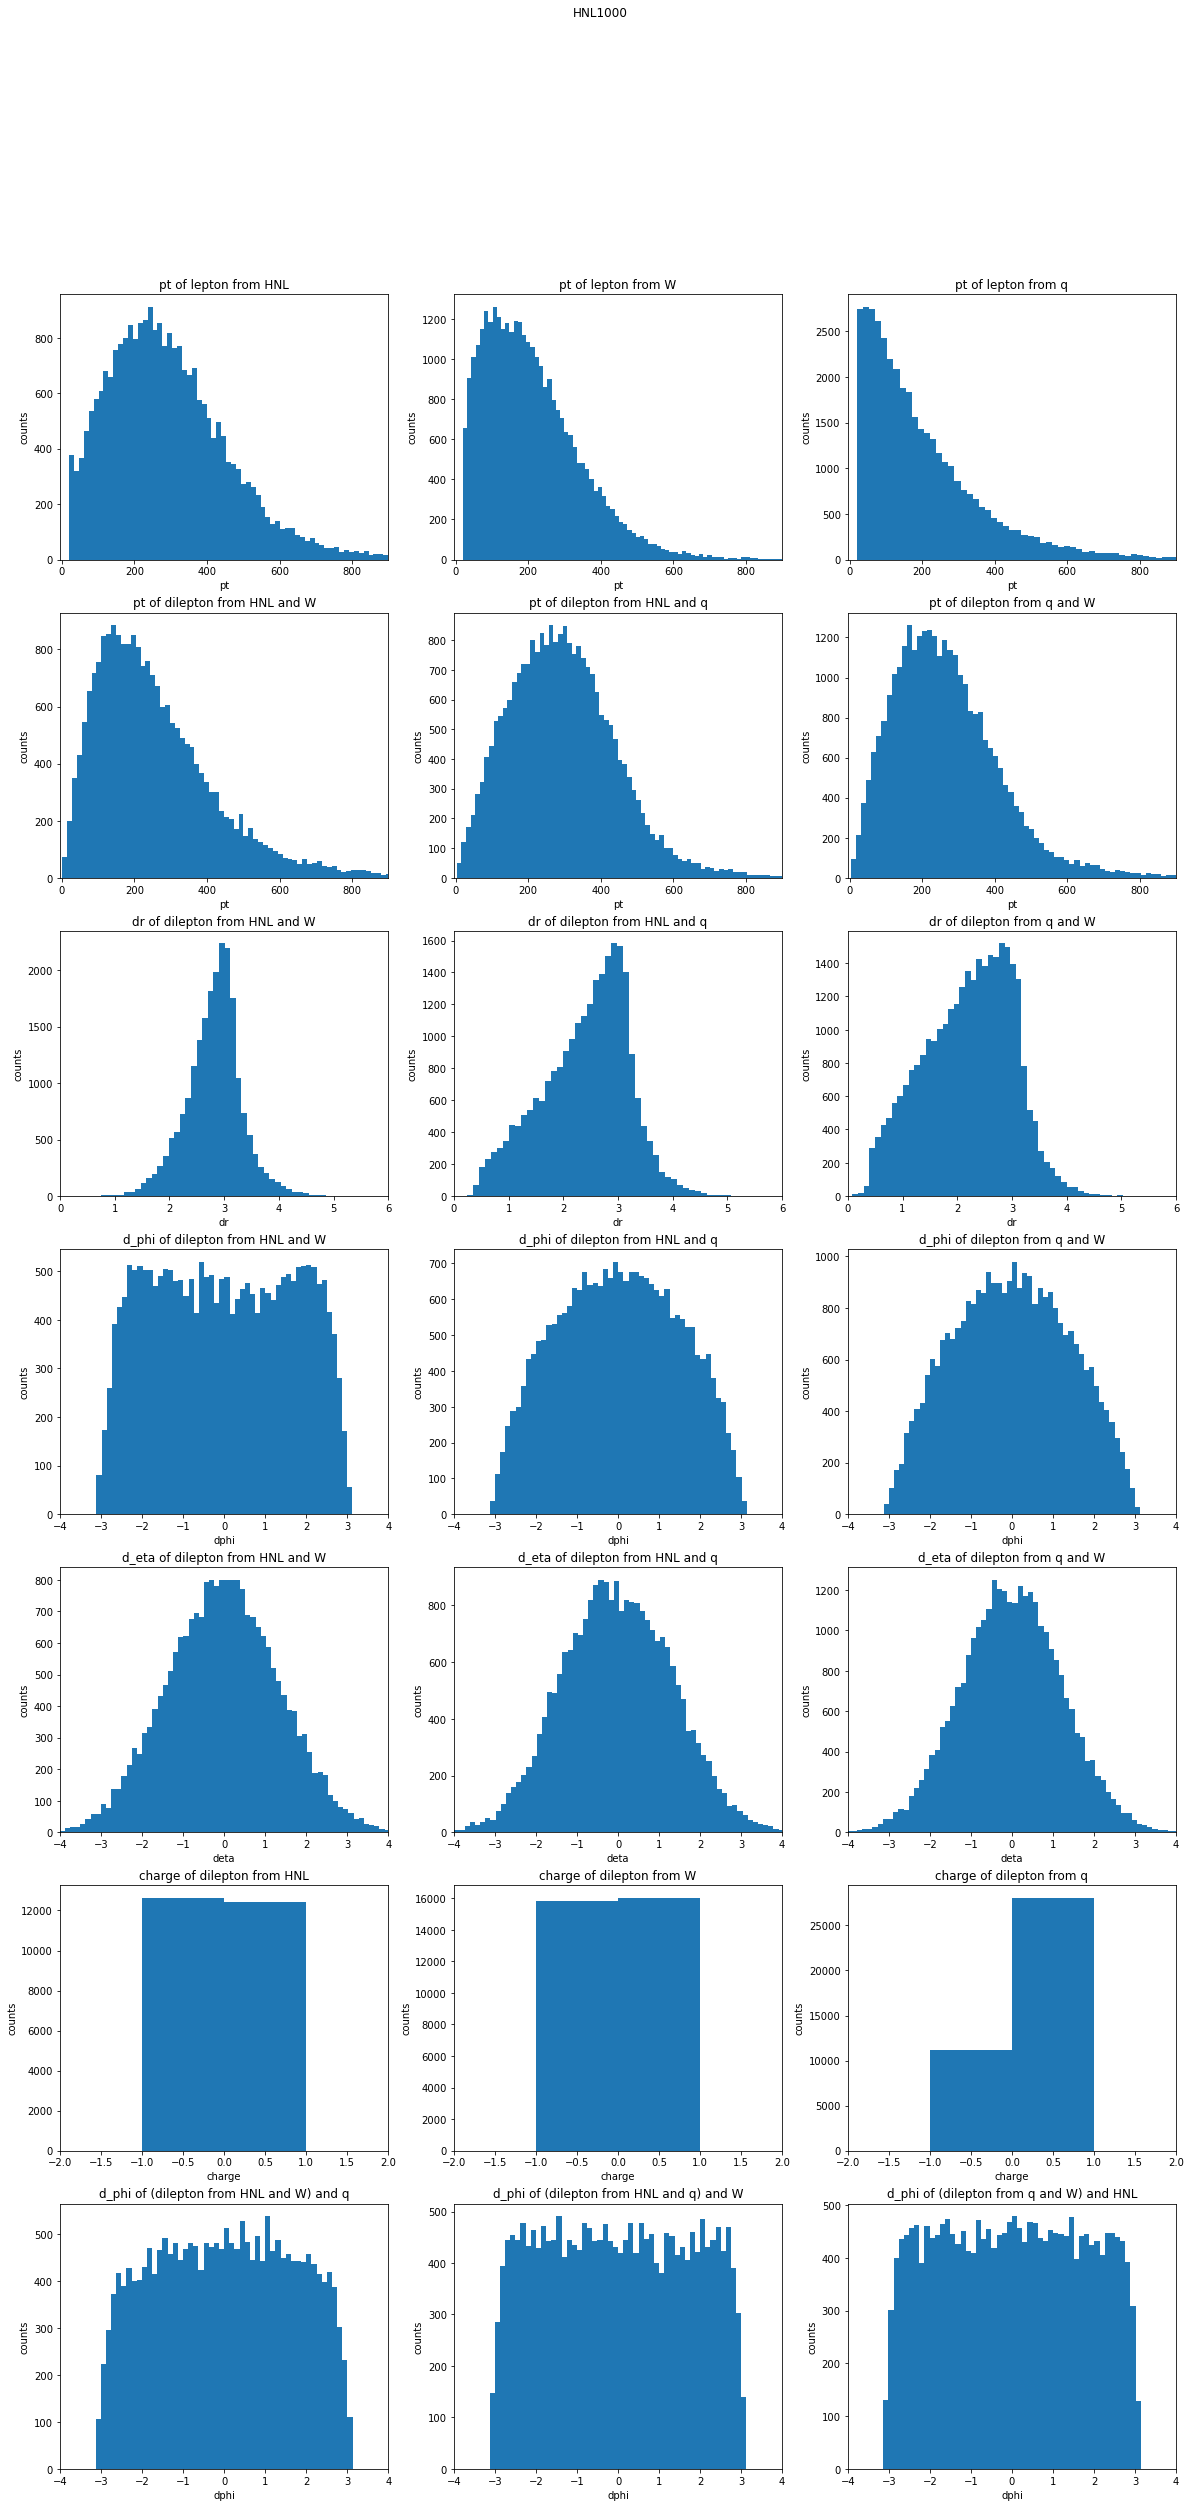

In [3]:
import awkward as ak
from coffea.nanoevents import NanoEventsFactory, NanoAODSchema
from helpers import delta_r, delta_phi, inv_mass_3p, cos_opening_angle, inv_mass, delta_eta
from samples import signal_samples
from helpers import files_from_dir, files_from_dirs
import numpy as np
local_dir = "C:\\Users\\lucas\\Desktop\\PDM\\data\\HeavyNeutrino_trilepton\\HeavyNeutrino_trilepton_M-1000_V-0p01_tau_NLO_tauhFilter_TuneCP5_13TeV-madgraph-pythia8"
samples = files_from_dir(local_dir),


overall_dilepton_from_q_and_W_deta= []
overall_dilepton_from_HNL_and_W_deta= []
overall_dilepton_from_HNL_and_q_deta= []
overall_dilepton_from_q_and_W_dphi= []
overall_dilepton_from_HNL_and_W_dphi= []
overall_dilepton_from_HNL_and_q_dphi= []
overall_dilepton_from_q_and_W_dr= []
overall_dilepton_from_HNL_and_W_dr= []
overall_dilepton_from_HNL_and_q_dr= []
overall_dilepton_from_q_and_W_pt= []
overall_dilepton_from_HNL_and_W_pt= []
overall_dilepton_from_HNL_and_q_pt= []
overall_lepton_from_HNL_pt= []
overall_lepton_from_W_pt= []
overall_lepton_from_q_pt= []
overall_lepton_from_HNL_charge= []
overall_lepton_from_W_charge= []
overall_lepton_from_q_charge = []
overall_dilepton_from_q_and_W_with_HNL_dphi = []
overall_dilepton_from_HNL_and_W_with_q_dphi = []
overall_dilepton_from_HNL_and_q_with_W_dphi = []

i_file = 1
tot_events = 0
for file in samples[0]:
    events = NanoEventsFactory.from_root(file, schemaclass=NanoAODSchema).events()
    print(str(i_file)+"/"+str(len(samples[0])))
    i_file = i_file+1
    nb_events = len(events)
    tot_events = tot_events+nb_events

    events['weight'] = events.genWeight
    events['SelElectron'] = events.Electron[(events.Electron.pt > 20.) & (events.Electron.mvaFall17V2Iso_WP90 > 0.5)]
    events['SelMuon'] = events.Muon[(events.Muon.pt > 24.) & (events.Muon.mediumPromptId) & (events.Muon.pfRelIso03_all < 0.2) & (np.abs(events.Muon.dxy) < 0.005)]
    muon1, electron1 = ak.unzip(ak.cartesian([events.SelMuon, events.SelElectron], nested=True))
    match1 = ak.any(muon1.jetIdx == electron1.jetIdx, axis=-1, mask_identity=False)
    events['SelMuon_sing'] = events.SelMuon[(~(match1))]  
    events['SelTau'] = events.Tau[(events.Tau.pt > 20.) & (events.Tau.idDeepTau2017v2p1VSmu > 0.5) & (events.Tau.idDeepTau2017v2p1VSe > 0.5) & (events.Tau.idDeepTau2017v2p1VSjet >=8)]
    tau2, electron2 = ak.unzip(ak.cartesian([events.SelTau, events.SelElectron], nested=True))
    match2 = ak.any(tau2.jetIdx == electron2.jetIdx, axis=-1, mask_identity=False)
    tau3, electron3 = ak.unzip(ak.cartesian([events.SelTau, events.SelElectron], nested=True))
    match3 = ak.any(tau3.jetIdx == electron3.jetIdx, axis=-1, mask_identity=False)
    events['SelTau_sing'] = events.SelTau[((~(match2) & ~(match3)) )]


    events = events[ak.num(events.SelTau) + ak.num(events.SelElectron) + ak.num(events.SelMuon) >=3]




    events['Electron_from_q'] = events.SelElectron[abs(events.GenPart[events.SelElectron.genPartIdx].distinctParent.distinctParent.pdgId) <=6]
    events['Electron_from_HNL'] = events.SelElectron[abs(events.GenPart[events.SelElectron.genPartIdx].distinctParent.pdgId) == 9900012]
    events['Electron_from_W'] = events.SelElectron[abs(events.GenPart[events.SelElectron.genPartIdx].distinctParent.pdgId) == 24]

    events['Muon_from_q'] = events.SelMuon_sing[abs(events.GenPart[events.SelMuon_sing.genPartIdx].distinctParent.distinctParent.pdgId) <=6]
    events['Muon_from_HNL'] = events.SelMuon_sing[abs(events.GenPart[events.SelMuon_sing.genPartIdx].distinctParent.pdgId) == 9900012]
    events['Muon_from_W'] = events.SelMuon_sing[abs(events.GenPart[events.SelMuon_sing.genPartIdx].distinctParent.pdgId) == 24]

    events['SelTau_sing_plus'] = events.SelTau_sing[events.SelTau_sing.genPartIdx < ak.num(events.GenVisTau)]
    events['Tau_from_HNL'] = events.SelTau_sing_plus[abs(events.GenVisTau[events.SelTau_sing_plus.genPartIdx].parent.distinctParent.pdgId) ==9900012 ]
    events['Tau_from_q'] = events.SelTau_sing_plus[abs(events.GenVisTau[events.SelTau_sing_plus.genPartIdx].parent.distinctParent.pdgId) <=6 ]
    events['Tau_from_W'] = events.SelTau_sing_plus[abs(events.GenVisTau[events.SelTau_sing_plus.genPartIdx].parent.distinctParent.pdgId) ==24 ]


    events['lepton_from_HNL'] = ak.concatenate([events.Electron_from_HNL, events.Muon_from_HNL, events.Tau_from_HNL], axis = -1)
    events['lepton_from_q'] = ak.concatenate([events.Electron_from_q, events.Muon_from_q, events.Tau_from_q], axis = -1)
    events['lepton_from_W'] = ak.concatenate([events.Electron_from_W, events.Muon_from_W, events.Tau_from_W], axis = -1)




    events['dilepton_from_HNL_and_W'] = ak.concatenate([events.lepton_from_HNL, events.lepton_from_W], axis = -1)
    events['dilepton_from_HNL_and_q'] = ak.concatenate([events.lepton_from_HNL, events.lepton_from_q], axis = -1)
    events['dilepton_from_q_and_W'] = ak.concatenate([events.lepton_from_q, events.lepton_from_W], axis = -1)


    dilepton_from_HNL_and_W_clean = events.dilepton_from_HNL_and_W[ak.num(events.dilepton_from_HNL_and_W) == 2]
    dilepton_from_HNL_and_q_clean = events.dilepton_from_HNL_and_q[ak.num(events.dilepton_from_HNL_and_q) == 2]
    dilepton_from_q_and_W_clean = events.dilepton_from_q_and_W[ak.num(events.dilepton_from_q_and_W) == 2]
    dilepton_from_HNL_and_W_pt = (dilepton_from_HNL_and_W_clean[:,0] +dilepton_from_HNL_and_W_clean[:,1]).pt
    dilepton_from_HNL_and_W_dr = delta_r(dilepton_from_HNL_and_W_clean[:,0] ,dilepton_from_HNL_and_W_clean[:,1])
    dilepton_from_HNL_and_W_dphi = delta_phi(dilepton_from_HNL_and_W_clean[:,0] ,dilepton_from_HNL_and_W_clean[:,1])
    dilepton_from_HNL_and_W_deta = delta_eta(dilepton_from_HNL_and_W_clean[:,0] ,dilepton_from_HNL_and_W_clean[:,1])

    dilepton_from_HNL_and_q_pt = (dilepton_from_HNL_and_q_clean[:,0] +dilepton_from_HNL_and_q_clean[:,1]).pt
    dilepton_from_HNL_and_q_dr = delta_r(dilepton_from_HNL_and_q_clean[:,0] ,dilepton_from_HNL_and_q_clean[:,1])
    dilepton_from_HNL_and_q_dphi = delta_phi(dilepton_from_HNL_and_q_clean[:,0] ,dilepton_from_HNL_and_q_clean[:,1])
    dilepton_from_HNL_and_q_deta = delta_eta(dilepton_from_HNL_and_q_clean[:,0] ,dilepton_from_HNL_and_q_clean[:,1])

    dilepton_from_q_and_W_pt = (dilepton_from_q_and_W_clean[:,0] +dilepton_from_q_and_W_clean[:,1]).pt
    dilepton_from_q_and_W_dr = delta_r(dilepton_from_q_and_W_clean[:,0] ,dilepton_from_q_and_W_clean[:,1])
    dilepton_from_q_and_W_dphi = delta_phi(dilepton_from_q_and_W_clean[:,0] ,dilepton_from_q_and_W_clean[:,1])
    dilepton_from_q_and_W_deta = delta_eta(dilepton_from_q_and_W_clean[:,0] ,dilepton_from_q_and_W_clean[:,1])
    lepton_from_HNL_pt = events.lepton_from_HNL.pt
    lepton_from_W_pt = events.lepton_from_W.pt
    lepton_from_q_pt = events.lepton_from_q.pt
    lepton_from_HNL_charge = events.lepton_from_HNL.charge
    lepton_from_W_charge = events.lepton_from_W.charge
    lepton_from_q_charge = events.lepton_from_q.charge

    dilepton_from_HNL_and_q_with_W_dphi_temp = events.lepton_from_W[ak.num(events.dilepton_from_HNL_and_q) == 2]
    dilepton_from_HNL_and_q_with_W_dphi = delta_phi(dilepton_from_HNL_and_q_clean[:,0] +dilepton_from_HNL_and_q_clean[:,1], dilepton_from_HNL_and_q_with_W_dphi_temp)

    dilepton_from_HNL_and_W_with_q_dphi_temp = events.lepton_from_q[ak.num(events.dilepton_from_HNL_and_W) == 2]
    dilepton_from_HNL_and_W_with_q_dphi = delta_phi(dilepton_from_HNL_and_W_clean[:,0] +dilepton_from_HNL_and_W_clean[:,1], dilepton_from_HNL_and_W_with_q_dphi_temp)

    dilepton_from_q_and_W_with_HNL_dphi_temp = events.lepton_from_HNL[ak.num(events.dilepton_from_q_and_W) == 2]
    dilepton_from_q_and_W_with_HNL_dphi = delta_phi(dilepton_from_q_and_W_clean[:,0] +dilepton_from_q_and_W_clean[:,1], dilepton_from_q_and_W_with_HNL_dphi_temp)




    overall_dilepton_from_q_and_W_deta.extend(ak.to_numpy(ak.flatten(dilepton_from_q_and_W_deta, axis = None)))
    overall_dilepton_from_HNL_and_W_deta.extend(ak.to_numpy(ak.flatten(dilepton_from_HNL_and_W_deta, axis = None)))
    overall_dilepton_from_HNL_and_q_deta.extend(ak.to_numpy(ak.flatten(dilepton_from_HNL_and_q_deta, axis = None)))

    overall_dilepton_from_q_and_W_dphi.extend(ak.to_numpy(ak.flatten(dilepton_from_q_and_W_dphi, axis = None)))
    overall_dilepton_from_HNL_and_W_dphi.extend(ak.to_numpy(ak.flatten(dilepton_from_HNL_and_W_dphi, axis = None)))
    overall_dilepton_from_HNL_and_q_dphi.extend(ak.to_numpy(ak.flatten(dilepton_from_HNL_and_q_dphi, axis = None)))

    overall_dilepton_from_q_and_W_dr.extend(ak.to_numpy(ak.flatten(dilepton_from_q_and_W_dr, axis = None)))
    overall_dilepton_from_HNL_and_W_dr.extend(ak.to_numpy(ak.flatten(dilepton_from_HNL_and_W_dr, axis = None)))
    overall_dilepton_from_HNL_and_q_dr.extend(ak.to_numpy(ak.flatten(dilepton_from_HNL_and_q_dr, axis = None)))


    overall_dilepton_from_q_and_W_pt.extend(ak.to_numpy(ak.flatten(dilepton_from_q_and_W_pt, axis = None)))
    overall_dilepton_from_HNL_and_W_pt.extend(ak.to_numpy(ak.flatten(dilepton_from_HNL_and_W_pt, axis = None)))
    overall_dilepton_from_HNL_and_q_pt.extend(ak.to_numpy(ak.flatten(dilepton_from_HNL_and_q_pt, axis = None)))


    overall_lepton_from_HNL_pt.extend(ak.to_numpy(ak.flatten(lepton_from_HNL_pt, axis = None))) 
    overall_lepton_from_W_pt.extend(ak.to_numpy(ak.flatten(lepton_from_W_pt, axis = None))) 
    overall_lepton_from_q_pt.extend(ak.to_numpy(ak.flatten(lepton_from_q_pt, axis = None))) 
    overall_lepton_from_HNL_charge.extend(ak.to_numpy(ak.flatten(lepton_from_HNL_charge, axis = None))) 
    overall_lepton_from_W_charge.extend(ak.to_numpy(ak.flatten(lepton_from_W_charge, axis = None))) 
    overall_lepton_from_q_charge.extend(ak.to_numpy(ak.flatten(lepton_from_q_charge, axis = None))) 


    overall_dilepton_from_q_and_W_with_HNL_dphi.extend(ak.to_numpy(ak.flatten(dilepton_from_q_and_W_with_HNL_dphi, axis = None))) 
    overall_dilepton_from_HNL_and_W_with_q_dphi.extend(ak.to_numpy(ak.flatten(dilepton_from_HNL_and_W_with_q_dphi, axis = None))) 
    overall_dilepton_from_HNL_and_q_with_W_dphi.extend(ak.to_numpy(ak.flatten(dilepton_from_HNL_and_q_with_W_dphi, axis = None))) 



nb_kept = len(overall_lepton_from_HNL_charge)
print("events kept/total: "+str(nb_kept)+"/"+str(tot_events))

import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
mn = -5
mx = 900
nbins = 150
plt.figure(figsize=(20,40))
plt.suptitle("HNL1000")
plt.subplot(7, 3, 1)
plt.hist(overall_lepton_from_HNL_pt, bins = nbins)
plt.title("pt of lepton from HNL")
plt.xlabel('pt')
plt.ylabel('counts')
plt.xlim(mn, mx)
plt.subplot(7, 3, 2)

plt.hist(overall_lepton_from_W_pt, bins = nbins)
plt.title("pt of lepton from W")
plt.xlabel('pt')
plt.ylabel('counts')
plt.xlim(mn, mx)
plt.subplot(7, 3, 3)

plt.hist(overall_lepton_from_q_pt, bins = nbins)
plt.title("pt of lepton from q")
plt.xlabel('pt')
plt.ylabel('counts')
plt.xlim(mn, mx)

#################################################
mn = -5
mx = 900
plt.subplot(7, 3, 4)
plt.hist(overall_dilepton_from_HNL_and_W_pt, bins = nbins)
plt.title("pt of dilepton from HNL and W")
plt.xlabel('pt')
plt.ylabel('counts')
plt.xlim(mn, mx)
plt.subplot(7, 3, 5)
plt.hist(overall_dilepton_from_HNL_and_q_pt, bins = nbins)
plt.title("pt of dilepton from HNL and q")
plt.xlabel('pt')
plt.ylabel('counts')
plt.xlim(mn, mx)
plt.subplot(7, 3, 6)
plt.hist(overall_dilepton_from_q_and_W_pt, bins = nbins)
plt.title("pt of dilepton from q and W")
plt.xlabel('pt')
plt.ylabel('counts')
plt.xlim(mn, mx)



#########################################
mn = 0
mx = 6
nbins = 50
plt.subplot(7, 3, 7)
plt.hist(overall_dilepton_from_HNL_and_W_dr, bins = nbins)
plt.title("dr of dilepton from HNL and W")
plt.xlabel('dr')
plt.ylabel('counts')
plt.xlim(mn, mx)
plt.subplot(7, 3, 8)
plt.hist(overall_dilepton_from_HNL_and_q_dr, bins = nbins)
plt.title("dr of dilepton from HNL and q")
plt.xlabel('dr')
plt.ylabel('counts')
plt.xlim(mn, mx)
plt.subplot(7, 3, 9)
plt.hist(overall_dilepton_from_q_and_W_dr, bins = nbins)
plt.title("dr of dilepton from q and W")
plt.xlabel('dr')
plt.ylabel('counts')
plt.xlim(mn, mx)
########################################3
mn = -4
mx = 4
nbins = 50
plt.subplot(7, 3, 10)
plt.hist(overall_dilepton_from_HNL_and_W_dphi, bins = nbins)
plt.title("d_phi of dilepton from HNL and W")
plt.xlabel('dphi')
plt.ylabel('counts')
plt.xlim(mn, mx)
plt.subplot(7, 3, 11)
plt.hist(overall_dilepton_from_HNL_and_q_dphi, bins = nbins)
plt.title("d_phi of dilepton from HNL and q")
plt.xlabel('dphi')
plt.ylabel('counts')
plt.xlim(mn, mx)
plt.subplot(7, 3, 12)
plt.hist(overall_dilepton_from_q_and_W_dphi, bins = nbins)
plt.title("d_phi of dilepton from q and W")
plt.xlabel('dphi')
plt.ylabel('counts')
plt.xlim(mn, mx)
########################################3
mn = -4
mx = 4
nbins = 75
plt.subplot(7, 3, 13)
plt.hist(overall_dilepton_from_HNL_and_W_deta, bins = nbins)
plt.title("d_eta of dilepton from HNL and W")
plt.xlabel('deta')
plt.ylabel('counts')
plt.xlim(mn, mx)
plt.subplot(7, 3, 14)
plt.hist(overall_dilepton_from_HNL_and_q_deta, bins = nbins)
plt.title("d_eta of dilepton from HNL and q")
plt.xlabel('deta')
plt.ylabel('counts')
plt.xlim(mn, mx)
plt.subplot(7, 3, 15)
plt.hist(overall_dilepton_from_q_and_W_deta, bins = nbins)
plt.title("d_eta of dilepton from q and W")
plt.xlabel('deta')
plt.ylabel('counts')
plt.xlim(mn, mx)
########################################3
mn = -2
mx = 2
nbins = 2
plt.subplot(7, 3, 16)
plt.hist(overall_lepton_from_HNL_charge, bins = nbins)
plt.title("charge of dilepton from HNL")
plt.xlabel('charge')
plt.ylabel('counts')
plt.xlim(mn, mx)
plt.subplot(7, 3, 17)
plt.hist(overall_lepton_from_W_charge, bins = nbins)
plt.title("charge of dilepton from W")
plt.xlabel('charge')
plt.ylabel('counts')
plt.xlim(mn, mx)
plt.subplot(7, 3, 18)
plt.hist(overall_lepton_from_q_charge, bins = nbins)
plt.title("charge of dilepton from q")
plt.xlabel('charge')
plt.ylabel('counts')
plt.xlim(mn, mx)

########################################3
mn = -4
mx = 4
nbins = 50
plt.subplot(7, 3, 19)
plt.hist(overall_dilepton_from_HNL_and_W_with_q_dphi, bins = nbins)
plt.title("d_phi of (dilepton from HNL and W) and q")
plt.xlabel('dphi')
plt.ylabel('counts')
plt.xlim(mn, mx)
plt.subplot(7, 3, 20)
plt.hist(overall_dilepton_from_HNL_and_q_with_W_dphi, bins = nbins)
plt.title("d_phi of (dilepton from HNL and q) and W")
plt.xlabel('dphi')
plt.ylabel('counts')
plt.xlim(mn, mx)
plt.subplot(7, 3, 21)
plt.hist(overall_dilepton_from_q_and_W_with_HNL_dphi, bins = nbins)
plt.title("d_phi of (dilepton from q and W) and HNL")
plt.xlabel('dphi')
plt.ylabel('counts')
plt.xlim(mn, mx)
########################################3


plt.savefig('signature_HNL1000.pdf')  

plt.show()

1/1
events kept/total: 14985/96498


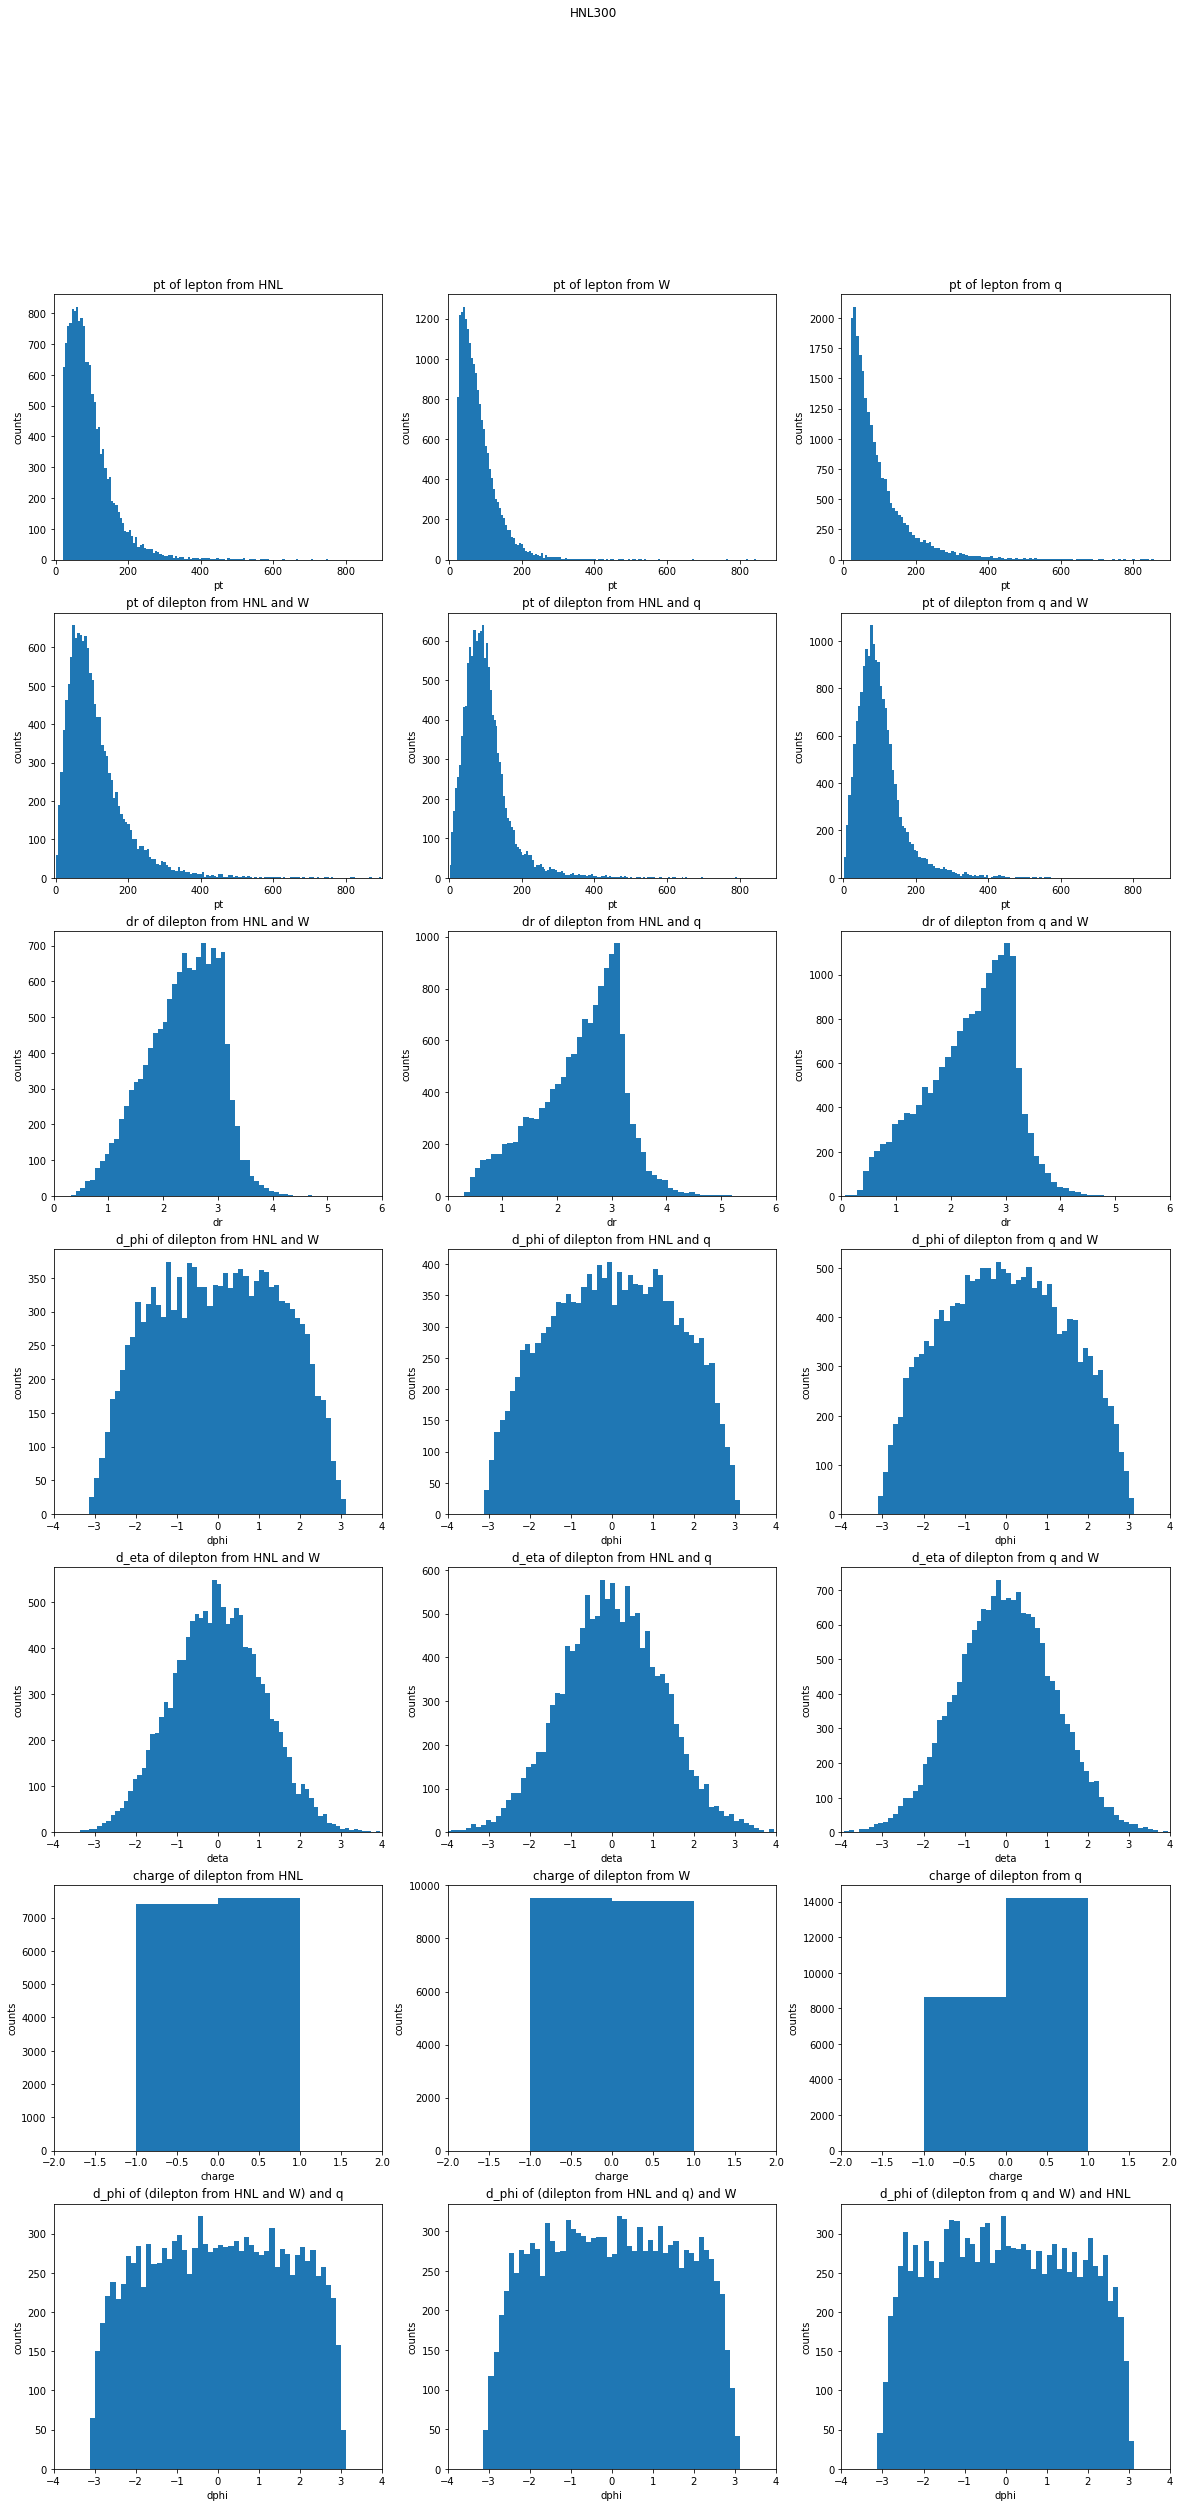

In [4]:
import awkward as ak
from coffea.nanoevents import NanoEventsFactory, NanoAODSchema
from helpers import delta_r, delta_phi, inv_mass_3p, cos_opening_angle, inv_mass, delta_eta
from samples import signal_samples
from helpers import files_from_dir, files_from_dirs
import numpy as np
local_dir = "C:\\Users\\lucas\\Desktop\\PDM\\data\\HeavyNeutrino_trilepton\\HeavyNeutrino_trilepton_M-300_V-0p01_tau_NLO_tauhFilter_TuneCP5_13TeV-madgraph-pythia8"
samples = files_from_dir(local_dir),


overall_dilepton_from_q_and_W_deta= []
overall_dilepton_from_HNL_and_W_deta= []
overall_dilepton_from_HNL_and_q_deta= []
overall_dilepton_from_q_and_W_dphi= []
overall_dilepton_from_HNL_and_W_dphi= []
overall_dilepton_from_HNL_and_q_dphi= []
overall_dilepton_from_q_and_W_dr= []
overall_dilepton_from_HNL_and_W_dr= []
overall_dilepton_from_HNL_and_q_dr= []
overall_dilepton_from_q_and_W_pt= []
overall_dilepton_from_HNL_and_W_pt= []
overall_dilepton_from_HNL_and_q_pt= []
overall_lepton_from_HNL_pt= []
overall_lepton_from_W_pt= []
overall_lepton_from_q_pt= []
overall_lepton_from_HNL_charge= []
overall_lepton_from_W_charge= []
overall_lepton_from_q_charge = []
overall_dilepton_from_q_and_W_with_HNL_dphi = []
overall_dilepton_from_HNL_and_W_with_q_dphi = []
overall_dilepton_from_HNL_and_q_with_W_dphi = []

i_file = 1
tot_events = 0
for file in samples[0]:
    events = NanoEventsFactory.from_root(file, schemaclass=NanoAODSchema).events()
    print(str(i_file)+"/"+str(len(samples[0])))
    i_file = i_file+1
    nb_events = len(events)
    tot_events = tot_events+nb_events

    events['weight'] = events.genWeight
    events['SelElectron'] = events.Electron[(events.Electron.pt > 20.) & (events.Electron.mvaFall17V2Iso_WP90 > 0.5)]
    events['SelMuon'] = events.Muon[(events.Muon.pt > 24.) & (events.Muon.mediumPromptId) & (events.Muon.pfRelIso03_all < 0.2) & (np.abs(events.Muon.dxy) < 0.005)]
    muon1, electron1 = ak.unzip(ak.cartesian([events.SelMuon, events.SelElectron], nested=True))
    match1 = ak.any(muon1.jetIdx == electron1.jetIdx, axis=-1, mask_identity=False)
    events['SelMuon_sing'] = events.SelMuon[(~(match1))]  
    events['SelTau'] = events.Tau[(events.Tau.pt > 20.) & (events.Tau.idDeepTau2017v2p1VSmu > 0.5) & (events.Tau.idDeepTau2017v2p1VSe > 0.5) & (events.Tau.idDeepTau2017v2p1VSjet >=8)]
    tau2, electron2 = ak.unzip(ak.cartesian([events.SelTau, events.SelElectron], nested=True))
    match2 = ak.any(tau2.jetIdx == electron2.jetIdx, axis=-1, mask_identity=False)
    tau3, electron3 = ak.unzip(ak.cartesian([events.SelTau, events.SelElectron], nested=True))
    match3 = ak.any(tau3.jetIdx == electron3.jetIdx, axis=-1, mask_identity=False)
    events['SelTau_sing'] = events.SelTau[((~(match2) & ~(match3)) )]


    events = events[ak.num(events.SelTau) + ak.num(events.SelElectron) + ak.num(events.SelMuon) >=3]




    events['Electron_from_q'] = events.SelElectron[abs(events.GenPart[events.SelElectron.genPartIdx].distinctParent.distinctParent.pdgId) <=6]
    events['Electron_from_HNL'] = events.SelElectron[abs(events.GenPart[events.SelElectron.genPartIdx].distinctParent.pdgId) == 9900012]
    events['Electron_from_W'] = events.SelElectron[abs(events.GenPart[events.SelElectron.genPartIdx].distinctParent.pdgId) == 24]

    events['Muon_from_q'] = events.SelMuon_sing[abs(events.GenPart[events.SelMuon_sing.genPartIdx].distinctParent.distinctParent.pdgId) <=6]
    events['Muon_from_HNL'] = events.SelMuon_sing[abs(events.GenPart[events.SelMuon_sing.genPartIdx].distinctParent.pdgId) == 9900012]
    events['Muon_from_W'] = events.SelMuon_sing[abs(events.GenPart[events.SelMuon_sing.genPartIdx].distinctParent.pdgId) == 24]

    events['SelTau_sing_plus'] = events.SelTau_sing[events.SelTau_sing.genPartIdx < ak.num(events.GenVisTau)]
    events['Tau_from_HNL'] = events.SelTau_sing_plus[abs(events.GenVisTau[events.SelTau_sing_plus.genPartIdx].parent.distinctParent.pdgId) ==9900012 ]
    events['Tau_from_q'] = events.SelTau_sing_plus[abs(events.GenVisTau[events.SelTau_sing_plus.genPartIdx].parent.distinctParent.pdgId) <=6 ]
    events['Tau_from_W'] = events.SelTau_sing_plus[abs(events.GenVisTau[events.SelTau_sing_plus.genPartIdx].parent.distinctParent.pdgId) ==24 ]


    events['lepton_from_HNL'] = ak.concatenate([events.Electron_from_HNL, events.Muon_from_HNL, events.Tau_from_HNL], axis = -1)
    events['lepton_from_q'] = ak.concatenate([events.Electron_from_q, events.Muon_from_q, events.Tau_from_q], axis = -1)
    events['lepton_from_W'] = ak.concatenate([events.Electron_from_W, events.Muon_from_W, events.Tau_from_W], axis = -1)




    events['dilepton_from_HNL_and_W'] = ak.concatenate([events.lepton_from_HNL, events.lepton_from_W], axis = -1)
    events['dilepton_from_HNL_and_q'] = ak.concatenate([events.lepton_from_HNL, events.lepton_from_q], axis = -1)
    events['dilepton_from_q_and_W'] = ak.concatenate([events.lepton_from_q, events.lepton_from_W], axis = -1)


    dilepton_from_HNL_and_W_clean = events.dilepton_from_HNL_and_W[ak.num(events.dilepton_from_HNL_and_W) == 2]
    dilepton_from_HNL_and_q_clean = events.dilepton_from_HNL_and_q[ak.num(events.dilepton_from_HNL_and_q) == 2]
    dilepton_from_q_and_W_clean = events.dilepton_from_q_and_W[ak.num(events.dilepton_from_q_and_W) == 2]
    dilepton_from_HNL_and_W_pt = (dilepton_from_HNL_and_W_clean[:,0] +dilepton_from_HNL_and_W_clean[:,1]).pt
    dilepton_from_HNL_and_W_dr = delta_r(dilepton_from_HNL_and_W_clean[:,0] ,dilepton_from_HNL_and_W_clean[:,1])
    dilepton_from_HNL_and_W_dphi = delta_phi(dilepton_from_HNL_and_W_clean[:,0] ,dilepton_from_HNL_and_W_clean[:,1])
    dilepton_from_HNL_and_W_deta = delta_eta(dilepton_from_HNL_and_W_clean[:,0] ,dilepton_from_HNL_and_W_clean[:,1])

    dilepton_from_HNL_and_q_pt = (dilepton_from_HNL_and_q_clean[:,0] +dilepton_from_HNL_and_q_clean[:,1]).pt
    dilepton_from_HNL_and_q_dr = delta_r(dilepton_from_HNL_and_q_clean[:,0] ,dilepton_from_HNL_and_q_clean[:,1])
    dilepton_from_HNL_and_q_dphi = delta_phi(dilepton_from_HNL_and_q_clean[:,0] ,dilepton_from_HNL_and_q_clean[:,1])
    dilepton_from_HNL_and_q_deta = delta_eta(dilepton_from_HNL_and_q_clean[:,0] ,dilepton_from_HNL_and_q_clean[:,1])

    dilepton_from_q_and_W_pt = (dilepton_from_q_and_W_clean[:,0] +dilepton_from_q_and_W_clean[:,1]).pt
    dilepton_from_q_and_W_dr = delta_r(dilepton_from_q_and_W_clean[:,0] ,dilepton_from_q_and_W_clean[:,1])
    dilepton_from_q_and_W_dphi = delta_phi(dilepton_from_q_and_W_clean[:,0] ,dilepton_from_q_and_W_clean[:,1])
    dilepton_from_q_and_W_deta = delta_eta(dilepton_from_q_and_W_clean[:,0] ,dilepton_from_q_and_W_clean[:,1])
    lepton_from_HNL_pt = events.lepton_from_HNL.pt
    lepton_from_W_pt = events.lepton_from_W.pt
    lepton_from_q_pt = events.lepton_from_q.pt
    lepton_from_HNL_charge = events.lepton_from_HNL.charge
    lepton_from_W_charge = events.lepton_from_W.charge
    lepton_from_q_charge = events.lepton_from_q.charge

    dilepton_from_HNL_and_q_with_W_dphi_temp = events.lepton_from_W[ak.num(events.dilepton_from_HNL_and_q) == 2]
    dilepton_from_HNL_and_q_with_W_dphi = delta_phi(dilepton_from_HNL_and_q_clean[:,0] +dilepton_from_HNL_and_q_clean[:,1], dilepton_from_HNL_and_q_with_W_dphi_temp)

    dilepton_from_HNL_and_W_with_q_dphi_temp = events.lepton_from_q[ak.num(events.dilepton_from_HNL_and_W) == 2]
    dilepton_from_HNL_and_W_with_q_dphi = delta_phi(dilepton_from_HNL_and_W_clean[:,0] +dilepton_from_HNL_and_W_clean[:,1], dilepton_from_HNL_and_W_with_q_dphi_temp)

    dilepton_from_q_and_W_with_HNL_dphi_temp = events.lepton_from_HNL[ak.num(events.dilepton_from_q_and_W) == 2]
    dilepton_from_q_and_W_with_HNL_dphi = delta_phi(dilepton_from_q_and_W_clean[:,0] +dilepton_from_q_and_W_clean[:,1], dilepton_from_q_and_W_with_HNL_dphi_temp)




    overall_dilepton_from_q_and_W_deta.extend(ak.to_numpy(ak.flatten(dilepton_from_q_and_W_deta, axis = None)))
    overall_dilepton_from_HNL_and_W_deta.extend(ak.to_numpy(ak.flatten(dilepton_from_HNL_and_W_deta, axis = None)))
    overall_dilepton_from_HNL_and_q_deta.extend(ak.to_numpy(ak.flatten(dilepton_from_HNL_and_q_deta, axis = None)))

    overall_dilepton_from_q_and_W_dphi.extend(ak.to_numpy(ak.flatten(dilepton_from_q_and_W_dphi, axis = None)))
    overall_dilepton_from_HNL_and_W_dphi.extend(ak.to_numpy(ak.flatten(dilepton_from_HNL_and_W_dphi, axis = None)))
    overall_dilepton_from_HNL_and_q_dphi.extend(ak.to_numpy(ak.flatten(dilepton_from_HNL_and_q_dphi, axis = None)))

    overall_dilepton_from_q_and_W_dr.extend(ak.to_numpy(ak.flatten(dilepton_from_q_and_W_dr, axis = None)))
    overall_dilepton_from_HNL_and_W_dr.extend(ak.to_numpy(ak.flatten(dilepton_from_HNL_and_W_dr, axis = None)))
    overall_dilepton_from_HNL_and_q_dr.extend(ak.to_numpy(ak.flatten(dilepton_from_HNL_and_q_dr, axis = None)))


    overall_dilepton_from_q_and_W_pt.extend(ak.to_numpy(ak.flatten(dilepton_from_q_and_W_pt, axis = None)))
    overall_dilepton_from_HNL_and_W_pt.extend(ak.to_numpy(ak.flatten(dilepton_from_HNL_and_W_pt, axis = None)))
    overall_dilepton_from_HNL_and_q_pt.extend(ak.to_numpy(ak.flatten(dilepton_from_HNL_and_q_pt, axis = None)))


    overall_lepton_from_HNL_pt.extend(ak.to_numpy(ak.flatten(lepton_from_HNL_pt, axis = None))) 
    overall_lepton_from_W_pt.extend(ak.to_numpy(ak.flatten(lepton_from_W_pt, axis = None))) 
    overall_lepton_from_q_pt.extend(ak.to_numpy(ak.flatten(lepton_from_q_pt, axis = None))) 
    overall_lepton_from_HNL_charge.extend(ak.to_numpy(ak.flatten(lepton_from_HNL_charge, axis = None))) 
    overall_lepton_from_W_charge.extend(ak.to_numpy(ak.flatten(lepton_from_W_charge, axis = None))) 
    overall_lepton_from_q_charge.extend(ak.to_numpy(ak.flatten(lepton_from_q_charge, axis = None))) 


    overall_dilepton_from_q_and_W_with_HNL_dphi.extend(ak.to_numpy(ak.flatten(dilepton_from_q_and_W_with_HNL_dphi, axis = None))) 
    overall_dilepton_from_HNL_and_W_with_q_dphi.extend(ak.to_numpy(ak.flatten(dilepton_from_HNL_and_W_with_q_dphi, axis = None))) 
    overall_dilepton_from_HNL_and_q_with_W_dphi.extend(ak.to_numpy(ak.flatten(dilepton_from_HNL_and_q_with_W_dphi, axis = None))) 



nb_kept = len(overall_lepton_from_HNL_charge)
print("events kept/total: "+str(nb_kept)+"/"+str(tot_events))

import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
mn = -5
mx = 900
nbins = 150
plt.figure(figsize=(20,40))
plt.suptitle("HNL300")
plt.subplot(7, 3, 1)
plt.hist(overall_lepton_from_HNL_pt, bins = nbins)
plt.title("pt of lepton from HNL")
plt.xlabel('pt')
plt.ylabel('counts')
plt.xlim(mn, mx)
plt.subplot(7, 3, 2)

plt.hist(overall_lepton_from_W_pt, bins = nbins)
plt.title("pt of lepton from W")
plt.xlabel('pt')
plt.ylabel('counts')
plt.xlim(mn, mx)
plt.subplot(7, 3, 3)

plt.hist(overall_lepton_from_q_pt, bins = nbins)
plt.title("pt of lepton from q")
plt.xlabel('pt')
plt.ylabel('counts')
plt.xlim(mn, mx)

#################################################
mn = -5
mx = 900
plt.subplot(7, 3, 4)
plt.hist(overall_dilepton_from_HNL_and_W_pt, bins = nbins)
plt.title("pt of dilepton from HNL and W")
plt.xlabel('pt')
plt.ylabel('counts')
plt.xlim(mn, mx)
plt.subplot(7, 3, 5)
plt.hist(overall_dilepton_from_HNL_and_q_pt, bins = nbins)
plt.title("pt of dilepton from HNL and q")
plt.xlabel('pt')
plt.ylabel('counts')
plt.xlim(mn, mx)
plt.subplot(7, 3, 6)
plt.hist(overall_dilepton_from_q_and_W_pt, bins = nbins)
plt.title("pt of dilepton from q and W")
plt.xlabel('pt')
plt.ylabel('counts')
plt.xlim(mn, mx)



#########################################
mn = 0
mx = 6
nbins = 50
plt.subplot(7, 3, 7)
plt.hist(overall_dilepton_from_HNL_and_W_dr, bins = nbins)
plt.title("dr of dilepton from HNL and W")
plt.xlabel('dr')
plt.ylabel('counts')
plt.xlim(mn, mx)
plt.subplot(7, 3, 8)
plt.hist(overall_dilepton_from_HNL_and_q_dr, bins = nbins)
plt.title("dr of dilepton from HNL and q")
plt.xlabel('dr')
plt.ylabel('counts')
plt.xlim(mn, mx)
plt.subplot(7, 3, 9)
plt.hist(overall_dilepton_from_q_and_W_dr, bins = nbins)
plt.title("dr of dilepton from q and W")
plt.xlabel('dr')
plt.ylabel('counts')
plt.xlim(mn, mx)
########################################3
mn = -4
mx = 4
nbins = 50
plt.subplot(7, 3, 10)
plt.hist(overall_dilepton_from_HNL_and_W_dphi, bins = nbins)
plt.title("d_phi of dilepton from HNL and W")
plt.xlabel('dphi')
plt.ylabel('counts')
plt.xlim(mn, mx)
plt.subplot(7, 3, 11)
plt.hist(overall_dilepton_from_HNL_and_q_dphi, bins = nbins)
plt.title("d_phi of dilepton from HNL and q")
plt.xlabel('dphi')
plt.ylabel('counts')
plt.xlim(mn, mx)
plt.subplot(7, 3, 12)
plt.hist(overall_dilepton_from_q_and_W_dphi, bins = nbins)
plt.title("d_phi of dilepton from q and W")
plt.xlabel('dphi')
plt.ylabel('counts')
plt.xlim(mn, mx)
########################################3
mn = -4
mx = 4
nbins = 75
plt.subplot(7, 3, 13)
plt.hist(overall_dilepton_from_HNL_and_W_deta, bins = nbins)
plt.title("d_eta of dilepton from HNL and W")
plt.xlabel('deta')
plt.ylabel('counts')
plt.xlim(mn, mx)
plt.subplot(7, 3, 14)
plt.hist(overall_dilepton_from_HNL_and_q_deta, bins = nbins)
plt.title("d_eta of dilepton from HNL and q")
plt.xlabel('deta')
plt.ylabel('counts')
plt.xlim(mn, mx)
plt.subplot(7, 3, 15)
plt.hist(overall_dilepton_from_q_and_W_deta, bins = nbins)
plt.title("d_eta of dilepton from q and W")
plt.xlabel('deta')
plt.ylabel('counts')
plt.xlim(mn, mx)
########################################3
mn = -2
mx = 2
nbins = 2
plt.subplot(7, 3, 16)
plt.hist(overall_lepton_from_HNL_charge, bins = nbins)
plt.title("charge of dilepton from HNL")
plt.xlabel('charge')
plt.ylabel('counts')
plt.xlim(mn, mx)
plt.subplot(7, 3, 17)
plt.hist(overall_lepton_from_W_charge, bins = nbins)
plt.title("charge of dilepton from W")
plt.xlabel('charge')
plt.ylabel('counts')
plt.xlim(mn, mx)
plt.subplot(7, 3, 18)
plt.hist(overall_lepton_from_q_charge, bins = nbins)
plt.title("charge of dilepton from q")
plt.xlabel('charge')
plt.ylabel('counts')
plt.xlim(mn, mx)

########################################3
mn = -4
mx = 4
nbins = 50
plt.subplot(7, 3, 19)
plt.hist(overall_dilepton_from_HNL_and_W_with_q_dphi, bins = nbins)
plt.title("d_phi of (dilepton from HNL and W) and q")
plt.xlabel('dphi')
plt.ylabel('counts')
plt.xlim(mn, mx)
plt.subplot(7, 3, 20)
plt.hist(overall_dilepton_from_HNL_and_q_with_W_dphi, bins = nbins)
plt.title("d_phi of (dilepton from HNL and q) and W")
plt.xlabel('dphi')
plt.ylabel('counts')
plt.xlim(mn, mx)
plt.subplot(7, 3, 21)
plt.hist(overall_dilepton_from_q_and_W_with_HNL_dphi, bins = nbins)
plt.title("d_phi of (dilepton from q and W) and HNL")
plt.xlabel('dphi')
plt.ylabel('counts')
plt.xlim(mn, mx)
########################################3


plt.savefig('signature_HNL300.pdf')  

plt.show()

1/3
2/3
3/3
events kept/total: 6124/281310


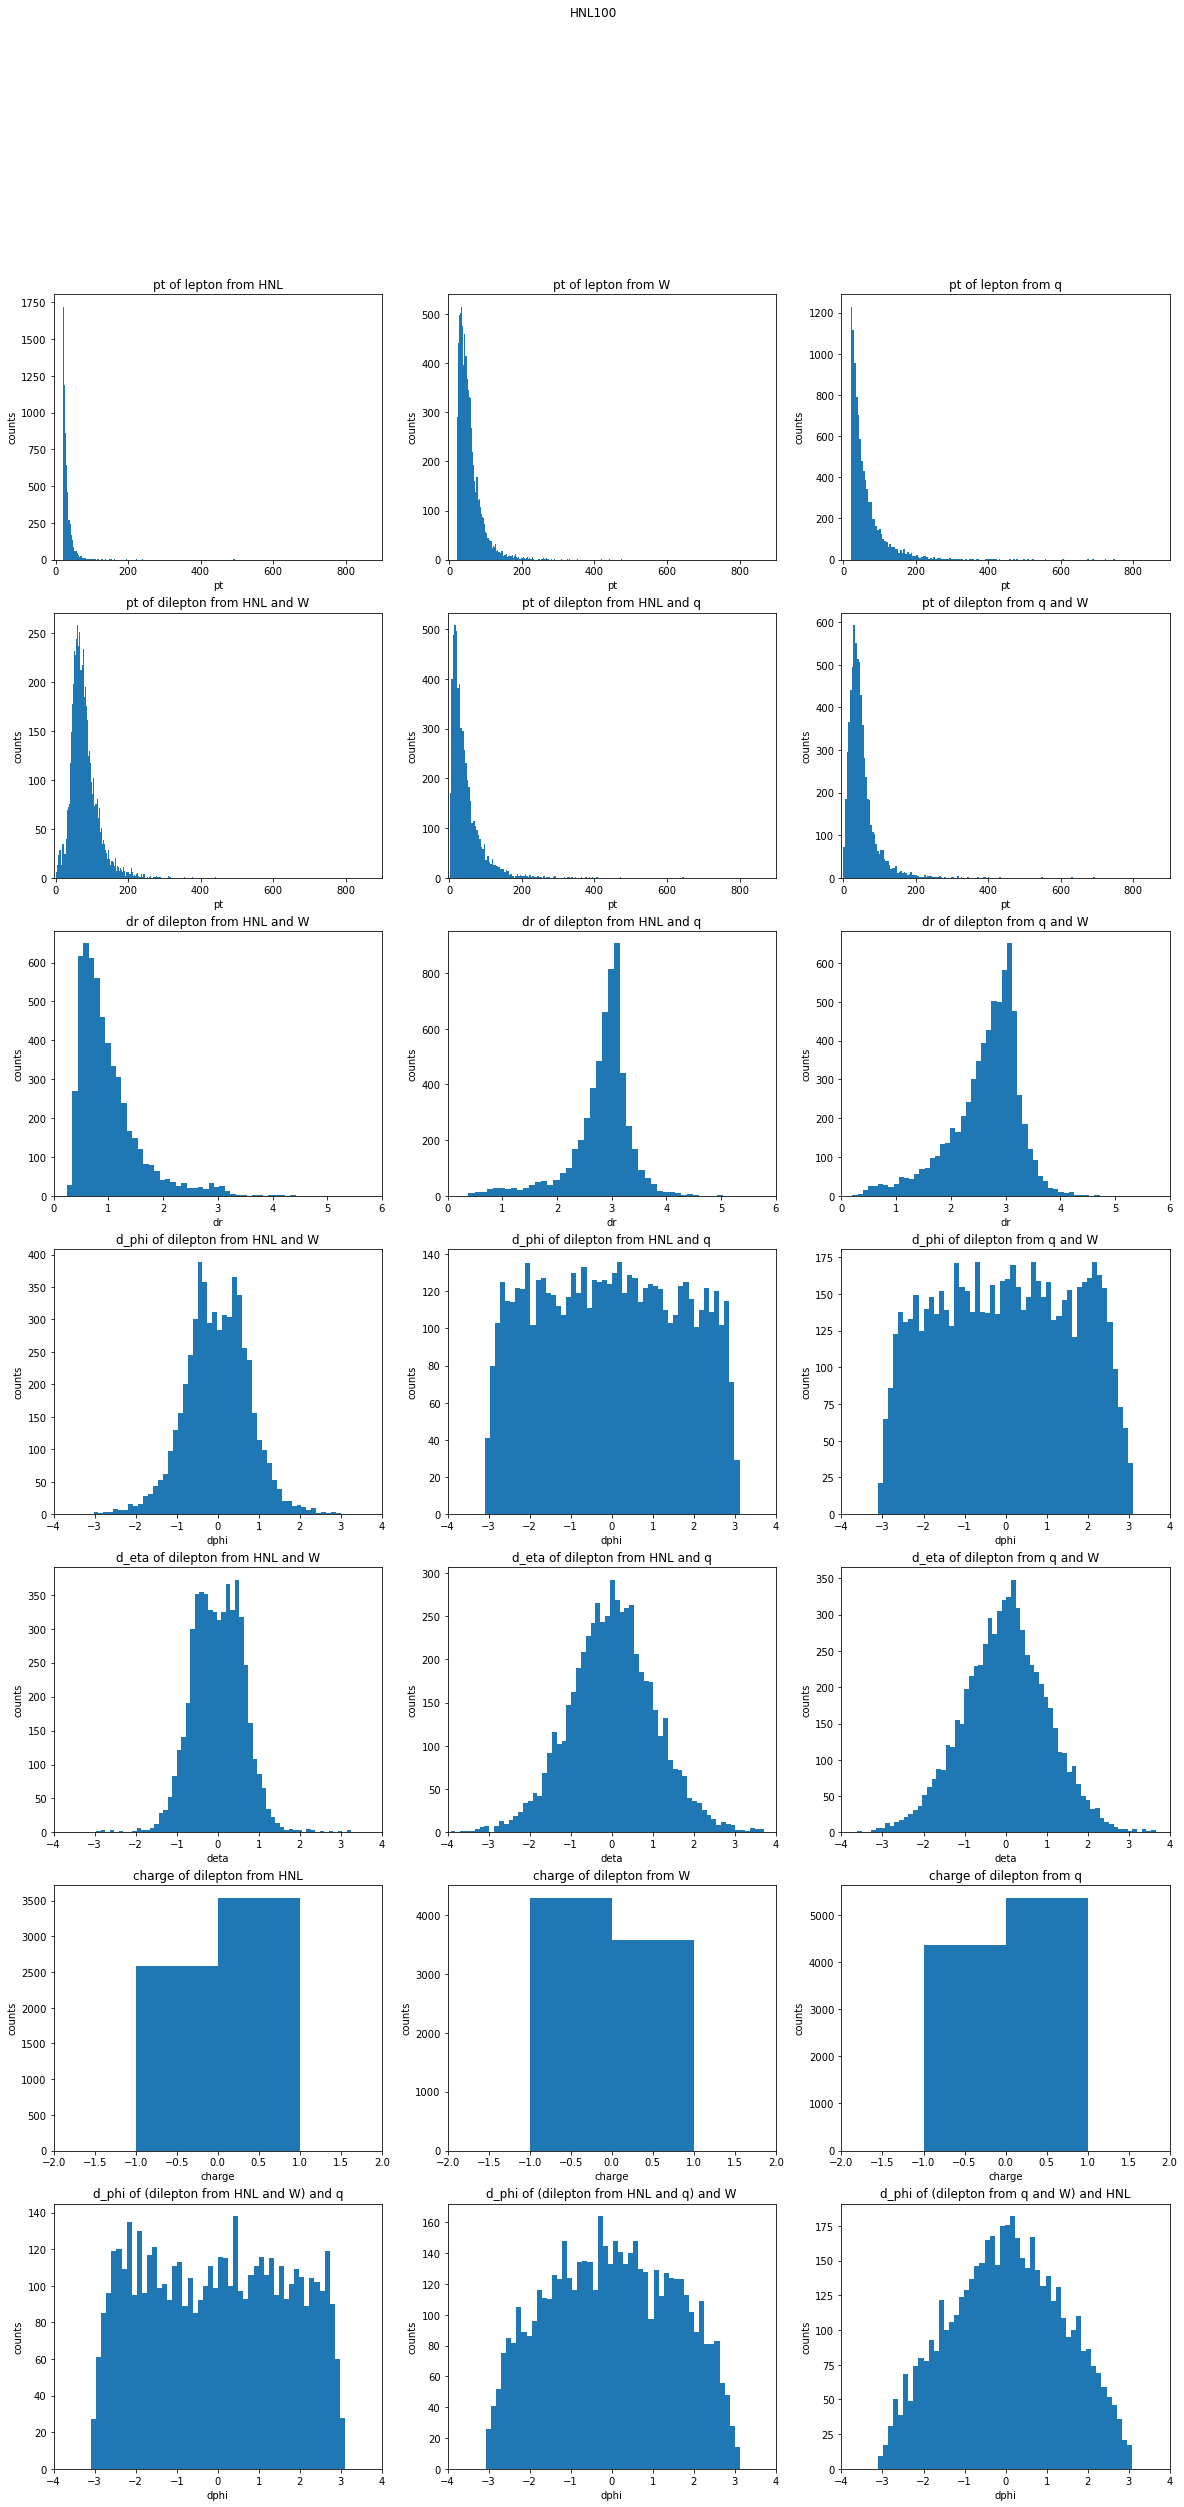

In [5]:
import awkward as ak
from coffea.nanoevents import NanoEventsFactory, NanoAODSchema
from helpers import delta_r, delta_phi, inv_mass_3p, cos_opening_angle, inv_mass, delta_eta
from samples import signal_samples
from helpers import files_from_dir, files_from_dirs
import numpy as np
local_dir = "C:\\Users\\lucas\\Desktop\\PDM\\data\\HeavyNeutrino_trilepton\\HeavyNeutrino_trilepton_M-100_V-0p01_tau_NLO_tauhFilter_TuneCP5_13TeV-madgraph-pythia8"
samples = files_from_dir(local_dir),


overall_dilepton_from_q_and_W_deta= []
overall_dilepton_from_HNL_and_W_deta= []
overall_dilepton_from_HNL_and_q_deta= []
overall_dilepton_from_q_and_W_dphi= []
overall_dilepton_from_HNL_and_W_dphi= []
overall_dilepton_from_HNL_and_q_dphi= []
overall_dilepton_from_q_and_W_dr= []
overall_dilepton_from_HNL_and_W_dr= []
overall_dilepton_from_HNL_and_q_dr= []
overall_dilepton_from_q_and_W_pt= []
overall_dilepton_from_HNL_and_W_pt= []
overall_dilepton_from_HNL_and_q_pt= []
overall_lepton_from_HNL_pt= []
overall_lepton_from_W_pt= []
overall_lepton_from_q_pt= []
overall_lepton_from_HNL_charge= []
overall_lepton_from_W_charge= []
overall_lepton_from_q_charge = []
overall_dilepton_from_q_and_W_with_HNL_dphi = []
overall_dilepton_from_HNL_and_W_with_q_dphi = []
overall_dilepton_from_HNL_and_q_with_W_dphi = []

i_file = 1
tot_events = 0
for file in samples[0]:
    events = NanoEventsFactory.from_root(file, schemaclass=NanoAODSchema).events()
    print(str(i_file)+"/"+str(len(samples[0])))
    i_file = i_file+1
    nb_events = len(events)
    tot_events = tot_events+nb_events

    events['weight'] = events.genWeight
    events['SelElectron'] = events.Electron[(events.Electron.pt > 20.) & (events.Electron.mvaFall17V2Iso_WP90 > 0.5)]
    events['SelMuon'] = events.Muon[(events.Muon.pt > 24.) & (events.Muon.mediumPromptId) & (events.Muon.pfRelIso03_all < 0.2) & (np.abs(events.Muon.dxy) < 0.005)]
    muon1, electron1 = ak.unzip(ak.cartesian([events.SelMuon, events.SelElectron], nested=True))
    match1 = ak.any(muon1.jetIdx == electron1.jetIdx, axis=-1, mask_identity=False)
    events['SelMuon_sing'] = events.SelMuon[(~(match1))]  
    events['SelTau'] = events.Tau[(events.Tau.pt > 20.) & (events.Tau.idDeepTau2017v2p1VSmu > 0.5) & (events.Tau.idDeepTau2017v2p1VSe > 0.5) & (events.Tau.idDeepTau2017v2p1VSjet >=8)]
    tau2, electron2 = ak.unzip(ak.cartesian([events.SelTau, events.SelElectron], nested=True))
    match2 = ak.any(tau2.jetIdx == electron2.jetIdx, axis=-1, mask_identity=False)
    tau3, electron3 = ak.unzip(ak.cartesian([events.SelTau, events.SelElectron], nested=True))
    match3 = ak.any(tau3.jetIdx == electron3.jetIdx, axis=-1, mask_identity=False)
    events['SelTau_sing'] = events.SelTau[((~(match2) & ~(match3)) )]


    events = events[ak.num(events.SelTau) + ak.num(events.SelElectron) + ak.num(events.SelMuon) >=3]




    events['Electron_from_q'] = events.SelElectron[abs(events.GenPart[events.SelElectron.genPartIdx].distinctParent.distinctParent.pdgId) <=6]
    events['Electron_from_HNL'] = events.SelElectron[abs(events.GenPart[events.SelElectron.genPartIdx].distinctParent.pdgId) == 9900012]
    events['Electron_from_W'] = events.SelElectron[abs(events.GenPart[events.SelElectron.genPartIdx].distinctParent.pdgId) == 24]

    events['Muon_from_q'] = events.SelMuon_sing[abs(events.GenPart[events.SelMuon_sing.genPartIdx].distinctParent.distinctParent.pdgId) <=6]
    events['Muon_from_HNL'] = events.SelMuon_sing[abs(events.GenPart[events.SelMuon_sing.genPartIdx].distinctParent.pdgId) == 9900012]
    events['Muon_from_W'] = events.SelMuon_sing[abs(events.GenPart[events.SelMuon_sing.genPartIdx].distinctParent.pdgId) == 24]

    events['SelTau_sing_plus'] = events.SelTau_sing[events.SelTau_sing.genPartIdx < ak.num(events.GenVisTau)]
    events['Tau_from_HNL'] = events.SelTau_sing_plus[abs(events.GenVisTau[events.SelTau_sing_plus.genPartIdx].parent.distinctParent.pdgId) ==9900012 ]
    events['Tau_from_q'] = events.SelTau_sing_plus[abs(events.GenVisTau[events.SelTau_sing_plus.genPartIdx].parent.distinctParent.pdgId) <=6 ]
    events['Tau_from_W'] = events.SelTau_sing_plus[abs(events.GenVisTau[events.SelTau_sing_plus.genPartIdx].parent.distinctParent.pdgId) ==24 ]


    events['lepton_from_HNL'] = ak.concatenate([events.Electron_from_HNL, events.Muon_from_HNL, events.Tau_from_HNL], axis = -1)
    events['lepton_from_q'] = ak.concatenate([events.Electron_from_q, events.Muon_from_q, events.Tau_from_q], axis = -1)
    events['lepton_from_W'] = ak.concatenate([events.Electron_from_W, events.Muon_from_W, events.Tau_from_W], axis = -1)




    events['dilepton_from_HNL_and_W'] = ak.concatenate([events.lepton_from_HNL, events.lepton_from_W], axis = -1)
    events['dilepton_from_HNL_and_q'] = ak.concatenate([events.lepton_from_HNL, events.lepton_from_q], axis = -1)
    events['dilepton_from_q_and_W'] = ak.concatenate([events.lepton_from_q, events.lepton_from_W], axis = -1)


    dilepton_from_HNL_and_W_clean = events.dilepton_from_HNL_and_W[ak.num(events.dilepton_from_HNL_and_W) == 2]
    dilepton_from_HNL_and_q_clean = events.dilepton_from_HNL_and_q[ak.num(events.dilepton_from_HNL_and_q) == 2]
    dilepton_from_q_and_W_clean = events.dilepton_from_q_and_W[ak.num(events.dilepton_from_q_and_W) == 2]
    dilepton_from_HNL_and_W_pt = (dilepton_from_HNL_and_W_clean[:,0] +dilepton_from_HNL_and_W_clean[:,1]).pt
    dilepton_from_HNL_and_W_dr = delta_r(dilepton_from_HNL_and_W_clean[:,0] ,dilepton_from_HNL_and_W_clean[:,1])
    dilepton_from_HNL_and_W_dphi = delta_phi(dilepton_from_HNL_and_W_clean[:,0] ,dilepton_from_HNL_and_W_clean[:,1])
    dilepton_from_HNL_and_W_deta = delta_eta(dilepton_from_HNL_and_W_clean[:,0] ,dilepton_from_HNL_and_W_clean[:,1])

    dilepton_from_HNL_and_q_pt = (dilepton_from_HNL_and_q_clean[:,0] +dilepton_from_HNL_and_q_clean[:,1]).pt
    dilepton_from_HNL_and_q_dr = delta_r(dilepton_from_HNL_and_q_clean[:,0] ,dilepton_from_HNL_and_q_clean[:,1])
    dilepton_from_HNL_and_q_dphi = delta_phi(dilepton_from_HNL_and_q_clean[:,0] ,dilepton_from_HNL_and_q_clean[:,1])
    dilepton_from_HNL_and_q_deta = delta_eta(dilepton_from_HNL_and_q_clean[:,0] ,dilepton_from_HNL_and_q_clean[:,1])

    dilepton_from_q_and_W_pt = (dilepton_from_q_and_W_clean[:,0] +dilepton_from_q_and_W_clean[:,1]).pt
    dilepton_from_q_and_W_dr = delta_r(dilepton_from_q_and_W_clean[:,0] ,dilepton_from_q_and_W_clean[:,1])
    dilepton_from_q_and_W_dphi = delta_phi(dilepton_from_q_and_W_clean[:,0] ,dilepton_from_q_and_W_clean[:,1])
    dilepton_from_q_and_W_deta = delta_eta(dilepton_from_q_and_W_clean[:,0] ,dilepton_from_q_and_W_clean[:,1])
    lepton_from_HNL_pt = events.lepton_from_HNL.pt
    lepton_from_W_pt = events.lepton_from_W.pt
    lepton_from_q_pt = events.lepton_from_q.pt
    lepton_from_HNL_charge = events.lepton_from_HNL.charge
    lepton_from_W_charge = events.lepton_from_W.charge
    lepton_from_q_charge = events.lepton_from_q.charge

    dilepton_from_HNL_and_q_with_W_dphi_temp = events.lepton_from_W[ak.num(events.dilepton_from_HNL_and_q) == 2]
    dilepton_from_HNL_and_q_with_W_dphi = delta_phi(dilepton_from_HNL_and_q_clean[:,0] +dilepton_from_HNL_and_q_clean[:,1], dilepton_from_HNL_and_q_with_W_dphi_temp)

    dilepton_from_HNL_and_W_with_q_dphi_temp = events.lepton_from_q[ak.num(events.dilepton_from_HNL_and_W) == 2]
    dilepton_from_HNL_and_W_with_q_dphi = delta_phi(dilepton_from_HNL_and_W_clean[:,0] +dilepton_from_HNL_and_W_clean[:,1], dilepton_from_HNL_and_W_with_q_dphi_temp)

    dilepton_from_q_and_W_with_HNL_dphi_temp = events.lepton_from_HNL[ak.num(events.dilepton_from_q_and_W) == 2]
    dilepton_from_q_and_W_with_HNL_dphi = delta_phi(dilepton_from_q_and_W_clean[:,0] +dilepton_from_q_and_W_clean[:,1], dilepton_from_q_and_W_with_HNL_dphi_temp)




    overall_dilepton_from_q_and_W_deta.extend(ak.to_numpy(ak.flatten(dilepton_from_q_and_W_deta, axis = None)))
    overall_dilepton_from_HNL_and_W_deta.extend(ak.to_numpy(ak.flatten(dilepton_from_HNL_and_W_deta, axis = None)))
    overall_dilepton_from_HNL_and_q_deta.extend(ak.to_numpy(ak.flatten(dilepton_from_HNL_and_q_deta, axis = None)))

    overall_dilepton_from_q_and_W_dphi.extend(ak.to_numpy(ak.flatten(dilepton_from_q_and_W_dphi, axis = None)))
    overall_dilepton_from_HNL_and_W_dphi.extend(ak.to_numpy(ak.flatten(dilepton_from_HNL_and_W_dphi, axis = None)))
    overall_dilepton_from_HNL_and_q_dphi.extend(ak.to_numpy(ak.flatten(dilepton_from_HNL_and_q_dphi, axis = None)))

    overall_dilepton_from_q_and_W_dr.extend(ak.to_numpy(ak.flatten(dilepton_from_q_and_W_dr, axis = None)))
    overall_dilepton_from_HNL_and_W_dr.extend(ak.to_numpy(ak.flatten(dilepton_from_HNL_and_W_dr, axis = None)))
    overall_dilepton_from_HNL_and_q_dr.extend(ak.to_numpy(ak.flatten(dilepton_from_HNL_and_q_dr, axis = None)))


    overall_dilepton_from_q_and_W_pt.extend(ak.to_numpy(ak.flatten(dilepton_from_q_and_W_pt, axis = None)))
    overall_dilepton_from_HNL_and_W_pt.extend(ak.to_numpy(ak.flatten(dilepton_from_HNL_and_W_pt, axis = None)))
    overall_dilepton_from_HNL_and_q_pt.extend(ak.to_numpy(ak.flatten(dilepton_from_HNL_and_q_pt, axis = None)))


    overall_lepton_from_HNL_pt.extend(ak.to_numpy(ak.flatten(lepton_from_HNL_pt, axis = None))) 
    overall_lepton_from_W_pt.extend(ak.to_numpy(ak.flatten(lepton_from_W_pt, axis = None))) 
    overall_lepton_from_q_pt.extend(ak.to_numpy(ak.flatten(lepton_from_q_pt, axis = None))) 
    overall_lepton_from_HNL_charge.extend(ak.to_numpy(ak.flatten(lepton_from_HNL_charge, axis = None))) 
    overall_lepton_from_W_charge.extend(ak.to_numpy(ak.flatten(lepton_from_W_charge, axis = None))) 
    overall_lepton_from_q_charge.extend(ak.to_numpy(ak.flatten(lepton_from_q_charge, axis = None))) 


    overall_dilepton_from_q_and_W_with_HNL_dphi.extend(ak.to_numpy(ak.flatten(dilepton_from_q_and_W_with_HNL_dphi, axis = None))) 
    overall_dilepton_from_HNL_and_W_with_q_dphi.extend(ak.to_numpy(ak.flatten(dilepton_from_HNL_and_W_with_q_dphi, axis = None))) 
    overall_dilepton_from_HNL_and_q_with_W_dphi.extend(ak.to_numpy(ak.flatten(dilepton_from_HNL_and_q_with_W_dphi, axis = None))) 



nb_kept = len(overall_lepton_from_HNL_charge)
print("events kept/total: "+str(nb_kept)+"/"+str(tot_events))

import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
mn = -5
mx = 900
nbins = 150
plt.figure(figsize=(20,40))
plt.suptitle("HNL100")
plt.subplot(7, 3, 1)
plt.hist(overall_lepton_from_HNL_pt, bins = nbins)
plt.title("pt of lepton from HNL")
plt.xlabel('pt')
plt.ylabel('counts')
plt.xlim(mn, mx)
plt.subplot(7, 3, 2)

plt.hist(overall_lepton_from_W_pt, bins = nbins)
plt.title("pt of lepton from W")
plt.xlabel('pt')
plt.ylabel('counts')
plt.xlim(mn, mx)
plt.subplot(7, 3, 3)

plt.hist(overall_lepton_from_q_pt, bins = nbins)
plt.title("pt of lepton from q")
plt.xlabel('pt')
plt.ylabel('counts')
plt.xlim(mn, mx)

#################################################
mn = -5
mx = 900
plt.subplot(7, 3, 4)
plt.hist(overall_dilepton_from_HNL_and_W_pt, bins = nbins)
plt.title("pt of dilepton from HNL and W")
plt.xlabel('pt')
plt.ylabel('counts')
plt.xlim(mn, mx)
plt.subplot(7, 3, 5)
plt.hist(overall_dilepton_from_HNL_and_q_pt, bins = nbins)
plt.title("pt of dilepton from HNL and q")
plt.xlabel('pt')
plt.ylabel('counts')
plt.xlim(mn, mx)
plt.subplot(7, 3, 6)
plt.hist(overall_dilepton_from_q_and_W_pt, bins = nbins)
plt.title("pt of dilepton from q and W")
plt.xlabel('pt')
plt.ylabel('counts')
plt.xlim(mn, mx)



#########################################
mn = 0
mx = 6
nbins = 50
plt.subplot(7, 3, 7)
plt.hist(overall_dilepton_from_HNL_and_W_dr, bins = nbins)
plt.title("dr of dilepton from HNL and W")
plt.xlabel('dr')
plt.ylabel('counts')
plt.xlim(mn, mx)
plt.subplot(7, 3, 8)
plt.hist(overall_dilepton_from_HNL_and_q_dr, bins = nbins)
plt.title("dr of dilepton from HNL and q")
plt.xlabel('dr')
plt.ylabel('counts')
plt.xlim(mn, mx)
plt.subplot(7, 3, 9)
plt.hist(overall_dilepton_from_q_and_W_dr, bins = nbins)
plt.title("dr of dilepton from q and W")
plt.xlabel('dr')
plt.ylabel('counts')
plt.xlim(mn, mx)
########################################3
mn = -4
mx = 4
nbins = 50
plt.subplot(7, 3, 10)
plt.hist(overall_dilepton_from_HNL_and_W_dphi, bins = nbins)
plt.title("d_phi of dilepton from HNL and W")
plt.xlabel('dphi')
plt.ylabel('counts')
plt.xlim(mn, mx)
plt.subplot(7, 3, 11)
plt.hist(overall_dilepton_from_HNL_and_q_dphi, bins = nbins)
plt.title("d_phi of dilepton from HNL and q")
plt.xlabel('dphi')
plt.ylabel('counts')
plt.xlim(mn, mx)
plt.subplot(7, 3, 12)
plt.hist(overall_dilepton_from_q_and_W_dphi, bins = nbins)
plt.title("d_phi of dilepton from q and W")
plt.xlabel('dphi')
plt.ylabel('counts')
plt.xlim(mn, mx)
########################################3
mn = -4
mx = 4
nbins = 75
plt.subplot(7, 3, 13)
plt.hist(overall_dilepton_from_HNL_and_W_deta, bins = nbins)
plt.title("d_eta of dilepton from HNL and W")
plt.xlabel('deta')
plt.ylabel('counts')
plt.xlim(mn, mx)
plt.subplot(7, 3, 14)
plt.hist(overall_dilepton_from_HNL_and_q_deta, bins = nbins)
plt.title("d_eta of dilepton from HNL and q")
plt.xlabel('deta')
plt.ylabel('counts')
plt.xlim(mn, mx)
plt.subplot(7, 3, 15)
plt.hist(overall_dilepton_from_q_and_W_deta, bins = nbins)
plt.title("d_eta of dilepton from q and W")
plt.xlabel('deta')
plt.ylabel('counts')
plt.xlim(mn, mx)
########################################3
mn = -2
mx = 2
nbins = 2
plt.subplot(7, 3, 16)
plt.hist(overall_lepton_from_HNL_charge, bins = nbins)
plt.title("charge of dilepton from HNL")
plt.xlabel('charge')
plt.ylabel('counts')
plt.xlim(mn, mx)
plt.subplot(7, 3, 17)
plt.hist(overall_lepton_from_W_charge, bins = nbins)
plt.title("charge of dilepton from W")
plt.xlabel('charge')
plt.ylabel('counts')
plt.xlim(mn, mx)
plt.subplot(7, 3, 18)
plt.hist(overall_lepton_from_q_charge, bins = nbins)
plt.title("charge of dilepton from q")
plt.xlabel('charge')
plt.ylabel('counts')
plt.xlim(mn, mx)

########################################3
mn = -4
mx = 4
nbins = 50
plt.subplot(7, 3, 19)
plt.hist(overall_dilepton_from_HNL_and_W_with_q_dphi, bins = nbins)
plt.title("d_phi of (dilepton from HNL and W) and q")
plt.xlabel('dphi')
plt.ylabel('counts')
plt.xlim(mn, mx)
plt.subplot(7, 3, 20)
plt.hist(overall_dilepton_from_HNL_and_q_with_W_dphi, bins = nbins)
plt.title("d_phi of (dilepton from HNL and q) and W")
plt.xlabel('dphi')
plt.ylabel('counts')
plt.xlim(mn, mx)
plt.subplot(7, 3, 21)
plt.hist(overall_dilepton_from_q_and_W_with_HNL_dphi, bins = nbins)
plt.title("d_phi of (dilepton from q and W) and HNL")
plt.xlabel('dphi')
plt.ylabel('counts')
plt.xlim(mn, mx)
########################################3


plt.savefig('signature_HNL100.pdf')  

plt.show()